### https://gluon.mxnet.io/chapter12_time-series/issm-scratch.html
### https://stackoverflow.com/questions/35192168/alternative-for-rs-exponential-smoothing-state-space-model-in-python-scikit-num
### https://github.com/statsmodels/statsmodels/blob/master/examples/notebooks/exponential_smoothing.ipynb
### https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

In [1]:
%pylab inline
from statsmodels.tsa.api import ExponentialSmoothing as ES, SimpleExpSmoothing as SES, Holt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


                 y
ds                
2009-10-01  338630
2009-11-01  339386
2009-12-01  400264
2010-01-01  314640
2010-02-01  311022


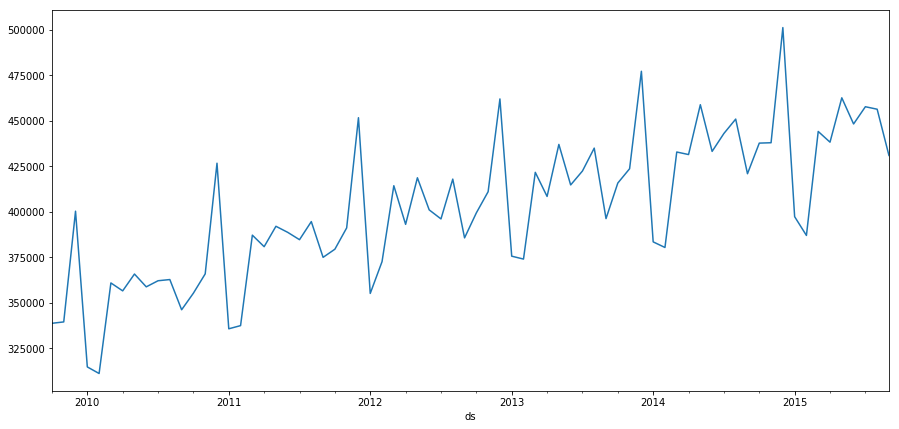

In [2]:
df = pd.read_csv('sales.csv',',', index_col=['ds'], parse_dates=['ds'], dayfirst=True)
print(df.head())
plt.figure(figsize(15,7))
df.y.plot()
pylab.show()

### Simple Exponential Smoothing

/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


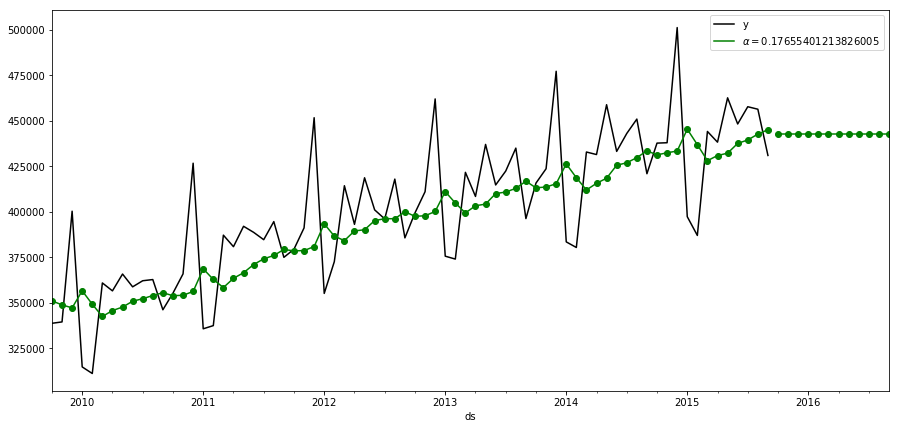

In [3]:
df.plot(color='black')

# fit1_ses = SES(df).fit(smoothing_level=0.2,optimized=False)
# fcast1_ses = fit1_ses.forecast(12).rename(r'$\alpha=0.2$')
# # plot
# fcast1_ses.plot(marker='o', color='blue', legend=True)
# fit1_ses.fittedvalues.plot(marker='o',  color='blue')
# 
# fit2_ses = SES(df).fit(smoothing_level=0.6,optimized=False)
# fcast2_ses = fit2_ses.forecast(12).rename(r'$\alpha=0.6$')
# # plot
# fcast2_ses.plot(marker='o', color='red', legend=True)
# fit2_ses.fittedvalues.plot(marker='o', color='red')

fit3_ses = SES(df).fit()
fcast3_ses = fit3_ses.forecast(12).rename(r'$\alpha=%s$'%fit3_ses.model.params['smoothing_level'])
# plot
fcast3_ses.plot(marker='o', color='green', legend=True)
fit3_ses.fittedvalues.plot(marker='o', color='green')

### Holt's method

/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


alpha = 0.10526315789473654, beta = 0.10526315789473684


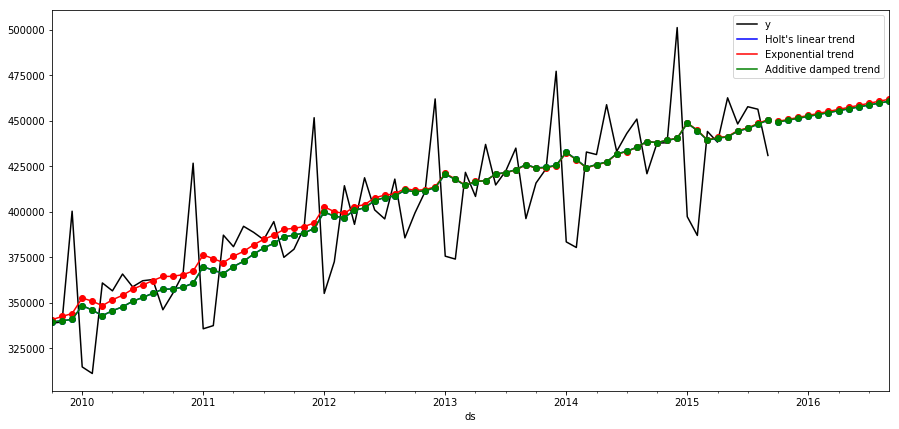

In [4]:
df.plot(color='black')

fit1_holt = Holt(df).fit()
fcast1_holt = fit1_holt.forecast(12).rename("Holt's linear trend")
# plot
fcast1_holt.plot(marker='o', color='blue', legend=True)
fit1_holt.fittedvalues.plot(marker='o', color='blue')

fit2_holt = Holt(df, exponential=True).fit()
fcast2_holt = fit2_holt.forecast(12).rename("Exponential trend")
# plot
fcast2_holt.plot(marker='o', color='red', legend=True)
fit2_holt.fittedvalues.plot(marker='o', color='red')

fit3_holt = Holt(df, damped=True).fit()
fcast3_holt = fit3_holt.forecast(12).rename("Additive damped trend")
# plot
fcast3_holt.plot(marker='o', color='green', legend=True)
fit3_holt.fittedvalues.plot(marker='o', color='green')

print('alpha = %s, beta = %s'% (fit1_holt.model.params['smoothing_level'],
                                fit1_holt.model.params['smoothing_slope']))

### Holt-Winter's method


/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: V

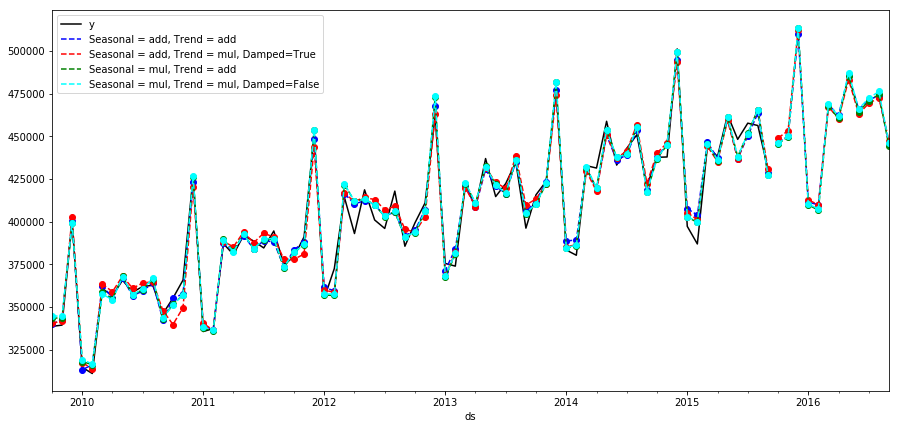

In [5]:
df.plot(color='black')

fit1_holt = ES(df, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fcast1_holt = fit1_holt.forecast(12).rename("Seasonal = add, Trend = add")
# plot
fcast1_holt.plot(style='--', marker='o', color='blue', legend=True)
fit1_holt.fittedvalues.plot(style='--', marker='o', color='blue')

fit2_holt = ES(df, seasonal_periods=12, trend='mul', seasonal='add', damped=True).fit(use_boxcox=True)
fcast2_holt = fit2_holt.forecast(12).rename("Seasonal = add, Trend = mul, Damped=True")
# plot
fcast2_holt.plot(style='--', marker='o', color='red', legend=True)
fit2_holt.fittedvalues.plot(style='--', marker='o', color='red')

fit3_holt = ES(df, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
fcast3_holt = fit3_holt.forecast(12).rename("Seasonal = mul, Trend = add")
# plot
fcast3_holt.plot(style='--', marker='o', color='green', legend=True)
fit3_holt.fittedvalues.plot(style='--', marker='o', color='green')

fit4_holt = ES(df, seasonal_periods=12, trend='mul', seasonal='mul', damped=False).fit(use_boxcox=True)
fcast4_holt = fit4_holt.forecast(12).rename("Seasonal = mul, Trend = mul, Damped=False")
# plot
fcast4_holt.plot(style='--', marker='o', color='cyan', legend=True)
fit4_holt.fittedvalues.plot(style='--', marker='o', color='cyan')

/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


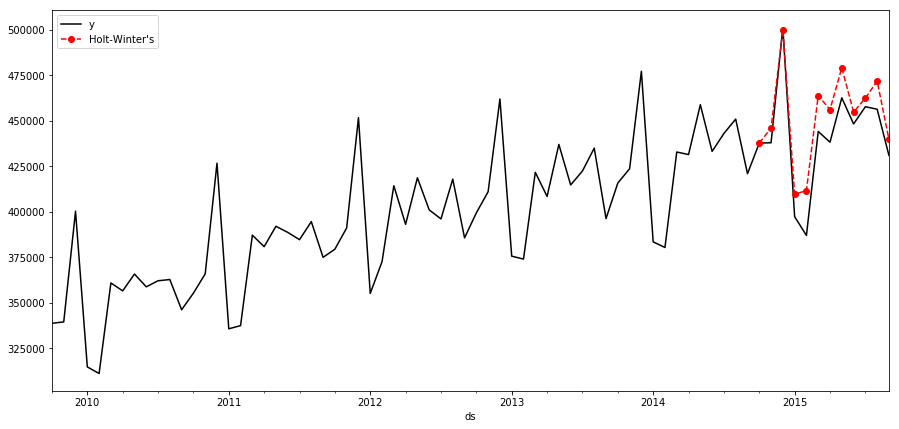

In [11]:
df_train = df[:-12]
df_test = df[-12:]

fit1_holt = ES(df_train, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fcast1_holt = fit1_holt.forecast(12).rename("Holt-Winter's")

df.plot(color='black')
fcast1_holt.plot(style='--', marker='o', color='red', legend=True)


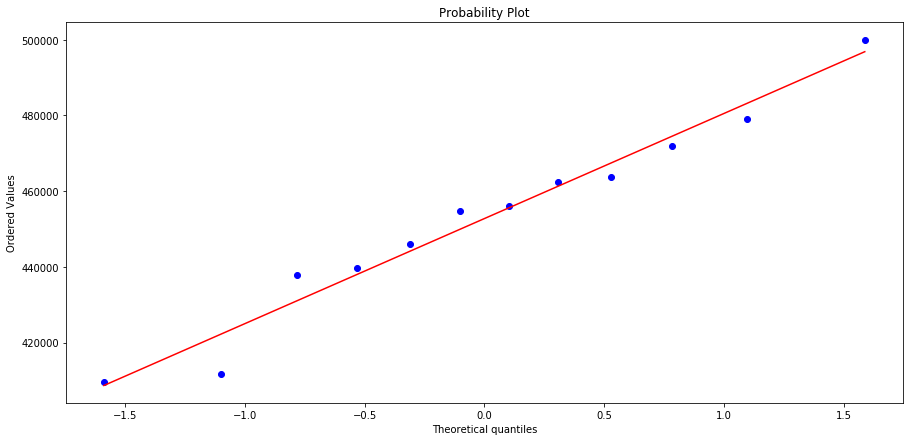

In [12]:
import scipy.stats as stats

measurements = fcast1_holt
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [14]:
print('MAE: {}'.format(np.mean(np.absolute(measurements - df_test.y))))
print('MAPE: {}'.format(np.mean(np.absolute(measurements - df_test.y)/df_test.y)))

MAE: 11345.428130521259
MAPE: 0.026355690194469875


In [ ]:
print(fit1_holt.summary())